In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68557_Z')

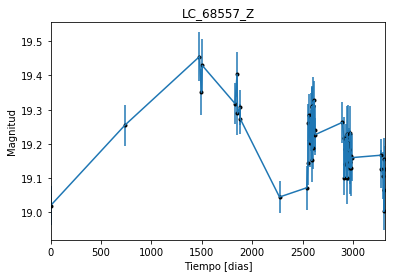

In [2]:
data = np.genfromtxt('LC_68557_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68557_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

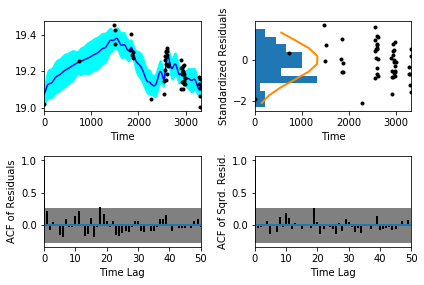

In [5]:
sample.assess_fit()

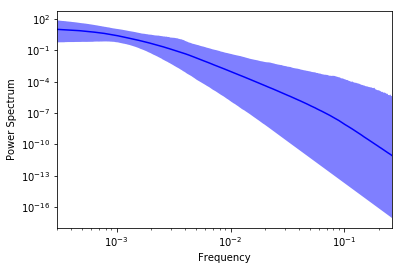

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68557_Z')

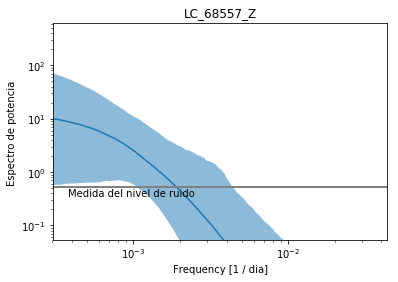

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68557_Z')

Text(0.5,1,'Prediccion , valor esperado LC_68557_Z')

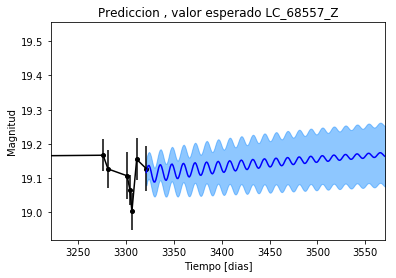

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_68557_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_68557_Z')

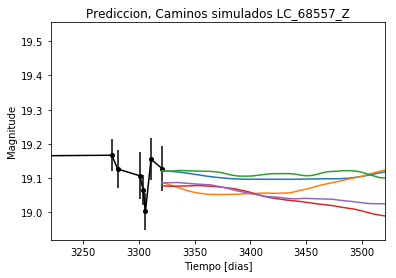

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68557_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68557_Z')

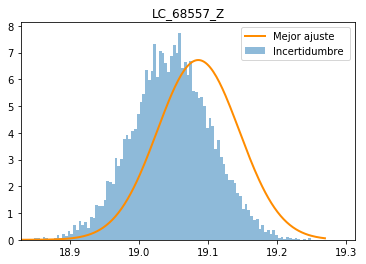

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68557_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_Z')

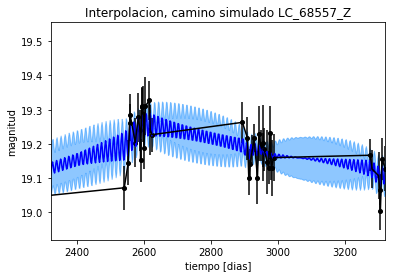

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_Z')

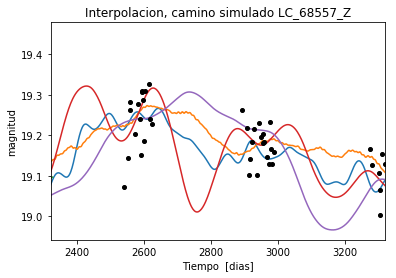

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 996.233669841
Median: 0.0057877942383
Standard deviation: 0.101959083696
68% credibility interval: [ 0.00064014  0.10092856]
95% credibility interval: [  3.29320908e-04   3.97089163e-01]
99% credibility interval: [  3.07550318e-04   4.95289221e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 457.576732795
Median: 0.00122549063048
Standard deviation: 0.0467340298048
68% credibility interval: [ 0.00044172  0.01405393]
95% credibility interval: [ 0.00031841  0.15415781]
99% credibility interval: [  3.05111363e-04   3.61250582e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 398.58952311
Median: 0.0132241513287
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1346.60952512
Median: 84.1869701488
Standard deviation: 1.55635257602
68% credibility interval: [ 82.42834432  85.27094406]
95% credibility interval: [ 79.95765006  85.95912005]
99% credibility interval: [ 77.87511243  86.29649943]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 475.398524841
Median: 0.418061014087
Standard deviation: 1.13290924704
68% credibility interval: [ 0.04277305  2.145428  ]
95% credibility interval: [ 0.01284391  3.71161687]
99% credibility interval: [ 0.00931622  5.07275625]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 356.707801076
Median: 0.119245762032
Standard deviation: 2.17751407452
68% credibility interval: [ 0.00530663  1.78856992]
95% credibility interval: [  3.86699627e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1856.94788784
Median: 9.00909226754e-54
Standard deviation: 8.74918595179e+75
68% credibility interval: [  1.86454455e-95   5.35686892e-12]
95% credibility interval: [  6.97682322e-163   1.31538914e+031]
99% credibility interval: [  1.15253604e-172   1.07179023e+067]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1755.92995312
Median: 19.1900344437
Standard deviation: 0.0820558189617
68% credibility interval: [ 19.12237716  19.25185747]
95% credibility interval: [ 19.00754419  19.34740057]
99% credibility interval: [ 18.89080729  19.45230967]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 217.703636838
Median: 0.00143655764752
Standard deviation: 0.116516896886
68% credibility interval: [ 0.          0.15463857]
95% credibility interval: [ 0.          0.42741118]
99% credibility interval: [ 0.          0.50658096]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 217.703636838
Median: 0.00143655764752
Standard deviation: 0.116516896886
68% credibility interval: [ 0.          0.15463857]
95% credibility interval: [ 0.          0.42741118]
99% credibility interval: [ 0.          0.50658096]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 391.202797731
Median: 0.0
Standard deviation: 0.000623823068426
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1346.60952512
Median: 84.1869701488
Standard deviation: 1.55635257602
68% credibility interval: [ 82.42834432  85.27094406]
95% credibility interval: [ 79.95765006  85.95912005]
99% credibility interval: [ 77.87511243  86.29649943]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 997.602868417
Median: 0.0203579933891
Standard deviation: 0.0325150516251
68% credibility interval: [ 0.01076539  0.04363004]
95% credibility interval: [ 0.0063669   0.10222896]
99% credibility interval: [ 0.00452197  0.19868636]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2473.74644555
Median: 0.921254710556
Standard deviation: 0.147460172266
68% credibility interval: [ 0.79330267  1.0819875 ]
95% credibility interval: [ 0.68965436  1.26766282]
99% credibility interval: [ 0.64121204  1.39321583]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1036.43436441
Median: 1.89578678139e-05
Standard deviation: 0.00997511259957
68% credibility interval: [  3.11319407e-07   4.81517093e-04]
95% credibility interval: [  5.06035853e-33   8.85956346e-03]
99% credibility interval: [  2.77084670e-72   6.91353047e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 996.233669841
Median: (-0.036365783719+0j)
Standard deviation: 0.972815701735
68% credibility interval: [-0.63415284+0.j         -0.00402210-0.00573194j]
95% credibility interval: [ -2.49498479e+00-0.07667812j  -2.06918429e-03-0.51387649j]
99% credibility interval: [ -3.11199396e+00+0.j          -1.93239564e-03-0.00270323j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 457.576732795
Median: (-0.00769998472351+0.00427529550433j)
Standard deviation: 0.78879021265
68% credibility interval: [-0.08830347+0.26282056j -0.00277544+0.00493818j]
95% credibility interval: [-0.96860212 +2.52568306e+00j -0.00200066 +2.18235240e-03j]
99% credibility interval: [ -2.26980435e+00+1.64175529j  -1.91707123e-03+0.00252065j]
Posterior su